In [21]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('mods_meta')
import mods_meta as mm
mu.update('collocations')
import collocations as coll
import pandas as pd

Updated file `D:\Documents\GitHub\Miscellaneous-Notebooks\Barn_kropp_Uri\mods_meta.py`

Updated file `D:\Documents\GitHub\Miscellaneous-Notebooks\Barn_kropp_Uri\collocations.py`

In [22]:
from random import choice, random, sample

# Lager korpus - adult and children

In [180]:
kroppsord = """håret nesen munnen tungen leppen leppene kinnet hjernen hjertet lungene Haanden øinene ørene øret hoftene midjen tennene
neglene neglen hendene øynene øyet øyenvippene øyenbrynene ansiktet pannen hodet halsen nakken skulderen skuldrene magen brystet brystene
 tommelen ankelen foten tærne tåen tåa rumpa låret lårene leggene leggen knærne kneet armen hånden albuen fingeren fingrene
lemmet kjønnet grotten skjødet kuken fitta haken kjeven kjevene kroppen tissen""".split()

In [117]:
kropps = """hår nese munn tunge leppe kinn hjerne hjerte lunger haand øine ører øre 
negler negl hender øyer øye øyenvipper øyenbryn ansikt panne hode hals nakke skulder skuldre mage bryst bryster
 tommel ankel fot tær tå rumpe lår  legger legg knær kne arm hånd albue finger fingre
lem kjønn grotte skjød kuk fitte hake kjeve kjever kropp tiss""".split()

In [122]:
pairs = []
for x in kropps:
    for y in kroppsord:
        if y.startswith(x.strip('r')):
            pairs.append((x,y))
pairs

[('hår', 'håret'),
 ('hår', 'hånden'),
 ('nese', 'nesen'),
 ('munn', 'munnen'),
 ('tunge', 'tungen'),
 ('leppe', 'leppen'),
 ('leppe', 'leppene'),
 ('kinn', 'kinnet'),
 ('hjerne', 'hjernen'),
 ('hjerte', 'hjertet'),
 ('lunger', 'lungene'),
 ('negler', 'neglene'),
 ('negler', 'neglen'),
 ('negl', 'neglene'),
 ('negl', 'neglen'),
 ('hender', 'hendene'),
 ('øyer', 'øyet'),
 ('øyer', 'øyenvippene'),
 ('øyer', 'øyenbrynene'),
 ('øye', 'øyet'),
 ('øye', 'øyenvippene'),
 ('øye', 'øyenbrynene'),
 ('øyenvipper', 'øyenvippene'),
 ('øyenbryn', 'øyenbrynene'),
 ('ansikt', 'ansiktet'),
 ('panne', 'pannen'),
 ('hode', 'hodet'),
 ('hals', 'halsen'),
 ('nakke', 'nakken'),
 ('skulder', 'skulderen'),
 ('skuldre', 'skuldrene'),
 ('mage', 'magen'),
 ('bryst', 'brystet'),
 ('bryst', 'brystene'),
 ('bryster', 'brystet'),
 ('bryster', 'brystene'),
 ('tommel', 'tommelen'),
 ('ankel', 'ankelen'),
 ('fot', 'foten'),
 ('tær', 'tærne'),
 ('tå', 'tåen'),
 ('tå', 'tåa'),
 ('lår', 'låret'),
 ('lår', 'lårene'),
 ('le

# Hent korpus og rensk

In [129]:
children_corpus = mm.meta_natbib(children=True, yearfrom=2010, yearto=2020, limit=100000)

In [130]:
adult_corpus = mm.meta_natbib(children = False, yearfrom = 2010, yearto = 2020, limit = 100000 )

In [132]:
print(
    len(children_corpus),
    len(adult_corpus)
)

6595 38526


# Trekk ut et sample på 1500 bøker fra hver

In [164]:
a_sample = sample(adult_corpus, 5000)

In [134]:
c_sample = sample(children_corpus, 1500)

# Hent metadata og rensk derfra

In [153]:
c_meta = nb.frame(mm.metadata([x[1] for x in c_sample])).fillna('')

In [166]:
a_meta = nb.frame(mm.metadata([x[1] for x in a_sample])).fillna('')

Tar ut de med eksplisitt barnebøker, holder alderen nede. Sørger også for at bøkene har en forfatter

In [173]:
c_select = c_meta[c_meta['653- - -a'].str.contains('barnebøker')][c_meta['100-1- -a'] != '' ]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [223]:
c_select.to_excel('barnekorpu_fra_2010_riktig_utgave.xls')

In [272]:
c_select = pd.read_excel('BARNrenset.xls', index_col=0)
c_select.dropna(subset=['100-1- -a'], inplace=True)
c_select.index = pd.to_numeric(c_select.index, downcast='integer')

In [287]:
c_select

,100-1- -a,245-1-0-a,260- - -c,653- - -a,lang,year,245-1-3-a,245-1-0-b,245-1-3-b
2011101705021,"Eriksen, Endre Lund",Pitbull-Terje på sporet av den tapte far,2010,"angst, barnebøker, barnelitteratur, fedre, for...",nob,2010.0,NaN,NaN,NaN
2011101706024,"Alvestad, Iselin B.",Absalons krigere,2010,"barnebøker, fantastisk, litteratur, ungdomsbøker",nob,2010.0,NaN,NaN,NaN
2011102106072,"Loe, Erlend",Kurt kurér,2010,"barnebøker, barnelitteratur, nonsens, nord-nor...",nob,2010.0,NaN,NaN,NaN
2011110906038,"Vatle, Sylvelin",Ramna-Floke,2010,"barnebøker, historie, island, ungdomsbøker, vi...",nno,2010.0,NaN,NaN,NaN
2011121506018,"Nilsson, Moni",Pappaen med de store skoene,2010,"barnebøker, familie, forelskelse, skilsmisse, ...",nob,2010.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019040977089,"Djupvik, Laura","God dag, herr Jul!",2014,"advent, barnebøker, familien, jul, julefortell...",nno,2014.0,NaN,NaN,NaN
2019052107103,"Prinja, Raman K.",Universet rocker,2014,"astronomi, barnebøker, planeter, stjerner, ver...",nob,2014.0,NaN,NaN,NaN
2019061977027,"Kaaberbøl, Lene",Blodsungen,2013,"barnebøker, fantastisk, hekser, litteratur, tr...",nob,2013.0,NaN,NaN,NaN
2019072407126,"Fyrileiv, Martin",Portvokteren,2014,"barnebøker, fantasy, folklore, norrøn mytologi...",nob,2014.0,NaN,NaN,NaN


In [174]:
a_select = a_meta[a_meta['653- - -a'].str.contains('skjønnlitteratur')]

In [222]:
a_select.to_excel('barnekropus_fra_2010.xls')

In [31]:
from time import time

In [32]:
def coll(w, corpus, before = 3, after = 3, step = 500):
    return pd.concat([nb.urn_coll(w, urns = corpus[i:i+step], after = after, before= before) for i in range(0, len(corpus), step)], sort=False, axis = 1).sum(axis=1)

def make_colls(urns, kroppsord, after = 1, before = 0):
    t = time()
    colls_bigram = dict()
    step = 50
    for w in  kroppsord:
            #print(w)
            colls_bigram[w] = coll(w, corpus = urns, after = 1, before= 0, step = step) 
            #print(time() - t)
            t = time()
    return colls_bigram

In [288]:
c0 = make_colls(list(nb.frame(c_select).index), kroppsord)

In [289]:
nb.frame(c0)[['hans','hennes']].sort_values(by='hennes',ascending=False).style.background_gradient(axis=1)

D:\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,hans,hennes
øynene,126,96
ansiktet,188,96
hånden,75,92
hodet,111,86
håret,43,62
kroppen,85,48
skulderen,37,44
armen,65,38
hendene,40,36
fingrene,13,30


In [184]:
c1 = make_colls(list(nb.frame(a_select).index), kroppsord)

In [185]:
nb.frame(c1)[['hans','hennes']].sort_values(by='hennes',ascending=False).style.background_gradient(axis=1)

,hans,hennes
ansiktet,258,211
øynene,182,126
hånden,108,104
kroppen,85,93
hodet,133,92
håret,59,86
skulderen,52,53
armen,70,47
skuldrene,22,45
munnen,64,45


# Pronomen og verb

In [290]:
p0 = make_colls(list(c_select.index), ['han','Han','hun','Hun'], after=3, before=0)

In [188]:
p1 = make_colls(list(nb.frame(a_select).index), ['han','Han','hun','Hun'], after=3, before=0)

In [291]:
pron0 = nb.frame(p0)


In [198]:
pron1 = nb.frame(p1)

# Fordeling, ca. 2 gangen i favør han

In [292]:
pron0.sum(axis=1)

han    40168.0
Han    16906.0
hun    22079.0
Hun     9958.0
dtype: float64

In [201]:
pron1.sum(axis=1)

han    68038.0
Han    26262.0
hun    38907.0
Hun    16009.0
dtype: float64

# Kollokasjoner tre ord til høyre for pronomenet

In [293]:
pron0[['gråter','skriker', 'hyler']]

,gråter,skriker,hyler
han,4.0,2.0,1.0
Han,3.0,1.0,NaN
hun,4.0,1.0,NaN
Hun,7.0,1.0,4.0


In [294]:
pron1[['gråter','skriker', 'hyler']]

,gråter,skriker,hyler
han,4.0,4.0,1.0
Han,5.0,1.0,NaN
hun,6.0,4.0,NaN
Hun,7.0,1.0,NaN


In [295]:
nb.frame(p1)[['hevder','mener', 'sier']]

,hevder,mener,sier
han,2.0,34.0,134.0
Han,1.0,12.0,129.0
hun,1.0,28.0,127.0
Hun,1.0,14.0,89.0


In [296]:
nb.frame(p0)[['hevder','mener', 'sier']]

,hevder,mener,sier
han,NaN,14.0,73.0
Han,1.0,5.0,42.0
hun,NaN,15.0,73.0
Hun,NaN,7.0,36.0


In [297]:
check = lambda p, w: p[[x for x in w if x in p]].fillna(0)

In [298]:
check(pron1, ['pisse','pisset', 'pisser', 'tisse','tisser', 'tisset']).style.background_gradient()

,pisse,pisset,tisse,tisset
han,1,2,0,1
Han,0,2,0,0
hun,0,0,1,1
Hun,0,0,0,1


In [299]:
check(pron0, ['pisse','pisset', 'pisser', 'tisse','tisser', 'tisset']).style.background_gradient()

,pisset,pisser,tisse,tisser,tisset
han,0,0,1,1,2
Han,0,0,0,0,0
hun,1,3,1,0,0
Hun,0,0,0,0,0


In [ ]:
nb.urn_c

# NB ngram

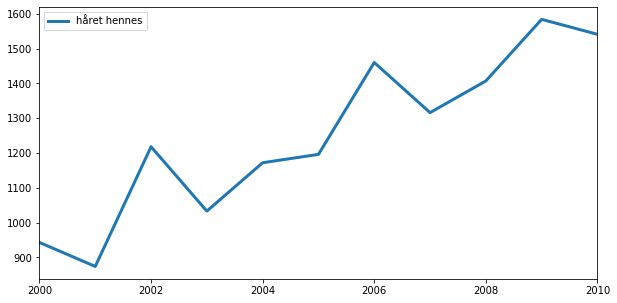

In [45]:
nb.frame(nb.bigram('håret','hennes', period=(2000, 2010), ddk="839%" ), 'håret hennes').plot(figsize=(10,5), lw=3)

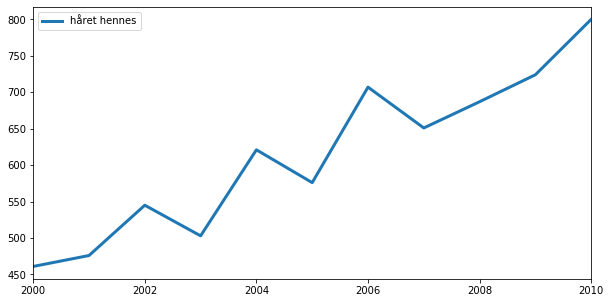

In [46]:
nb.frame(nb.bigram('håret','hans', period=(2000, 2010), ddk="839%" ), 'håret hennes').plot(figsize=(10,5), lw=3)

In [58]:
punkt = pd.concat([nb.unigram(p, period=(1920, 2010)) for p in ". , og i".split()]).sum(axis=1)

In [59]:
punkt

1920     2461506
1921     2549739
1922     2192631
1923     2362141
1924     2514046
          ...   
2006    10652588
2007     9240838
2008    10236087
2009    10239961
2010     9769292
Length: 364, dtype: int64

In [93]:
kroppen = pd.concat([nb.frame(nb.unigram(k_ord, period=(1920, 2010)), k_ord) for k_ord in kroppsord], axis=1, sort=False).fillna(0)

In [94]:
kroppen_hennes = pd.concat([nb.frame(nb.bigram(first=k_ord, second='hennes', period=(1920, 2010)), k_ord) for k_ord in kroppsord], axis=1, sort=False).fillna(0)

In [95]:
kroppen_hans = pd.concat([nb.frame(nb.bigram(first=k_ord, second='hans', period=(1920, 2010)), k_ord) for k_ord in kroppsord], axis=1, sort=False).fillna(0)

In [101]:
k_rel = nb.frame({k:kroppen[k]/punkt for k in kroppen})
k_rel_hennes = nb.frame({k:kroppen_hennes[k]/punkt for k in kroppen})
k_rel_hans = nb.frame({k:kroppen_hans[k]/punkt for k in kroppen})

In [110]:
top10 = k_rel.transpose().sum().sort_values(ascending=False).index[:10]

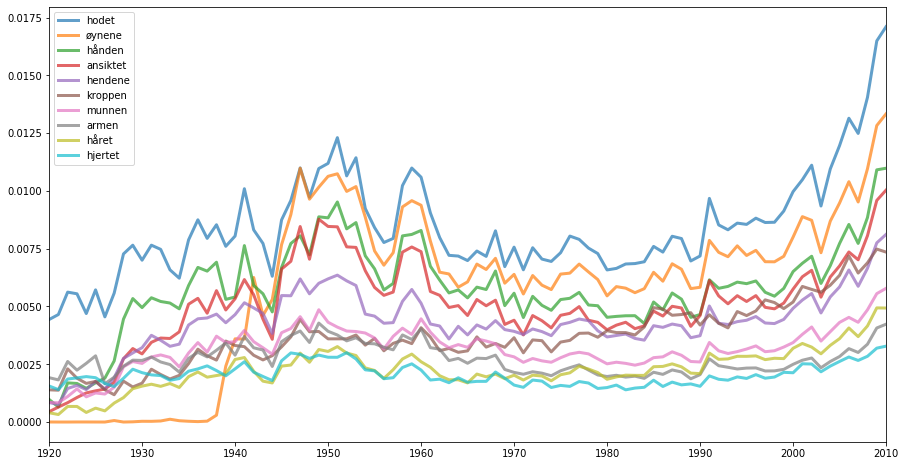

In [112]:
k_rel.transpose()[top10].plot(legend=True, figsize=(15, 8), lw=3, alpha=.7);

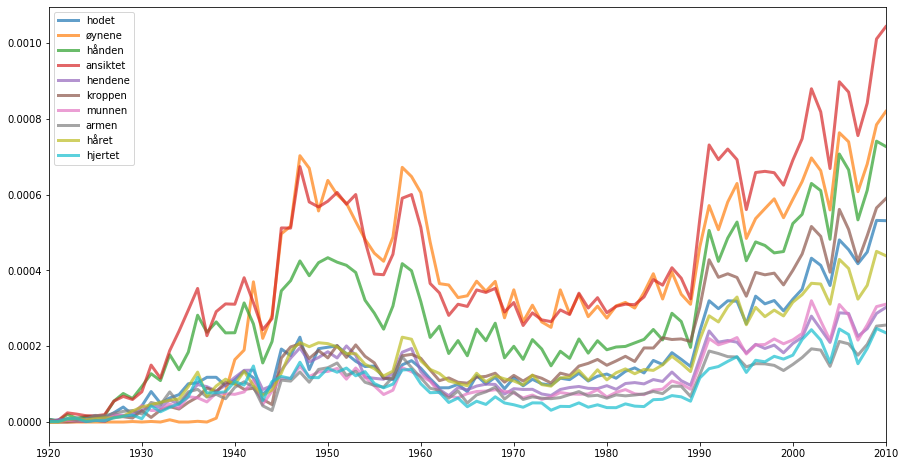

In [114]:
k_rel_hennes.transpose()[top10].plot(legend=True, figsize=(15, 8), lw=3, alpha=.7);

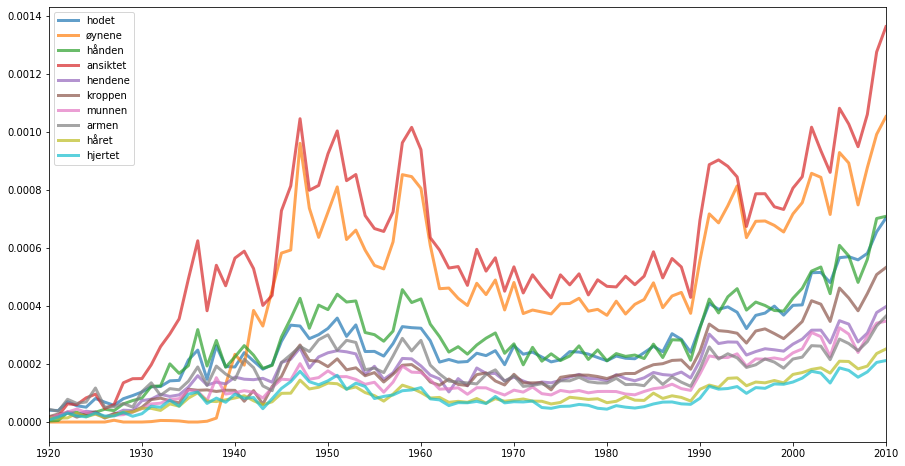

In [116]:
k_rel_hans.transpose()[top10].plot(legend=True, figsize=(15, 8), lw=3, alpha=.7);

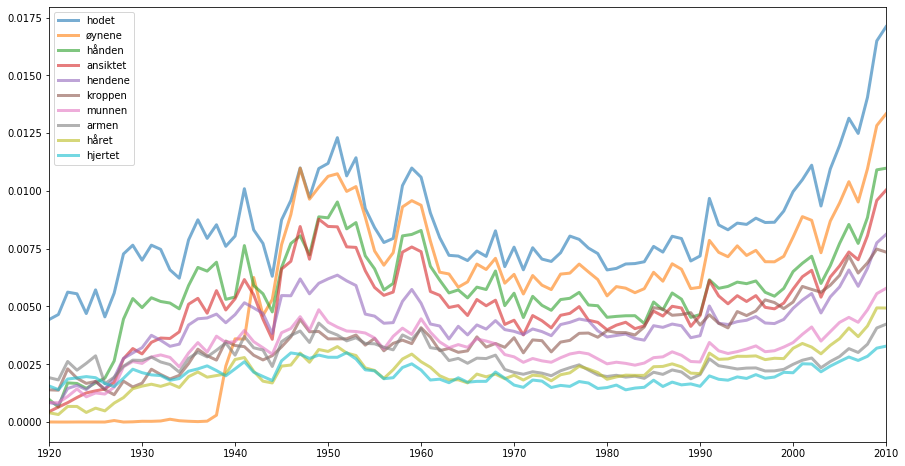

In [128]:
k_rel.transpose()[top10].plot(figsize=(15, 8), lw=3, alpha=.6, legend=True)